In [1]:
!pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 1.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/dataset/dataset.csv")
ss = pd.read_csv('/content/drive/MyDrive/dataset/Symptom-severity.csv')
sd = pd.read_csv('/content/drive/MyDrive/dataset/symptom_Description.csv')
sp = pd.read_csv('/content/drive/MyDrive/dataset/symptom_precaution.csv')


# df = pd.read_csv("/content/dataset.csv")
# ss = pd.read_csv('/content/Symptom-severity.csv')
# sd = pd.read_csv('/content/symptom_Description.csv')
# sp = pd.read_csv('/content/symptom_precaution.csv')

In [6]:
df.head()

Disease   Symptom_1  ... Symptom_16 Symptom_17
0  Fungal infection     itching  ...        NaN        NaN
1  Fungal infection   skin_rash  ...        NaN        NaN
2  Fungal infection     itching  ...        NaN        NaN
3  Fungal infection     itching  ...        NaN        NaN
4  Fungal infection     itching  ...        NaN        NaN

[5 rows x 18 columns]

In [7]:
ss.head()

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [8]:
sp.head()

Disease  ...                 Precaution_4
0   Drug Reaction  ...                    follow up
1         Malaria  ...           keep mosquitos out
2         Allergy  ...  use ice to compress itching
3  Hypothyroidism  ...             get proper sleep
4       Psoriasis  ...                   salt baths

[5 rows x 5 columns]

In [9]:
sd.head()

Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...

In [11]:
df.shape

(4920, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [13]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [14]:
df.describe()

Disease  Symptom_1  ...        Symptom_16    Symptom_17
count            4920       4920  ...               192            72
unique             41         34  ...                 3             1
top     Drug Reaction   vomiting  ...   blood_in_sputum   muscle_pain
freq              120        822  ...                72            72

[4 rows x 18 columns]

In [15]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [16]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [17]:
len(df['Disease'].unique())

41

In [18]:
df['Disease'].value_counts()

Drug Reaction                              120
Psoriasis                                  120
AIDS                                       120
Varicose veins                             120
Dengue                                     120
Migraine                                   120
Arthritis                                  120
Malaria                                    120
Pneumonia                                  120
Heart attack                               120
Jaundice                                   120
Hypoglycemia                               120
(vertigo) Paroymsal  Positional Vertigo    120
Allergy                                    120
hepatitis A                                120
Urinary tract infection                    120
GERD                                       120
Gastroenteritis                            120
Dimorphic hemmorhoids(piles)               120
Hyperthyroidism                            120
Typhoid                                    120
Hepatitis C  

In [19]:
df.count()

Disease       4920
Symptom_1     4920
Symptom_2     4920
Symptom_3     4920
Symptom_4     4572
Symptom_5     3714
Symptom_6     2934
Symptom_7     2268
Symptom_8     1944
Symptom_9     1692
Symptom_10    1512
Symptom_11    1194
Symptom_12     744
Symptom_13     504
Symptom_14     306
Symptom_15     240
Symptom_16     192
Symptom_17      72
dtype: int64

In [20]:
ss['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [21]:
vf1 = df
vf1=vf1.replace("NaN",0)


In [22]:
df=df.fillna(0)

In [23]:
df['Symptoms']=0
for i in range(df.shape[0]):
  values=df.iloc[i].values.tolist()
  df['Symptoms'][i]=values[1:values.index(0)]

In [24]:
col=df.columns[1:-1]
symptoms=pd.unique(df[col].values.ravel()).tolist()
symptoms.remove(0)
symptoms

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' stomach_pain',
 ' acidity',
 ' ulcers_on_tongue',
 ' vomiting',
 ' cough',
 ' chest_pain',
 ' yellowish_skin',
 ' nausea',
 ' loss_of_appetite',
 ' abdominal_pain',
 ' yellowing_of_eyes',
 ' burning_micturition',
 ' spotting_ urination',
 ' passage_of_gases',
 ' internal_itching',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' high_fever',
 ' extra_marital_contacts',
 ' fatigue',
 ' weight_loss',
 ' restlessness',
 ' lethargy',
 ' irregular_sugar_level',
 ' blurred_and_distorted_vision',
 ' obesity',
 ' excessive_hunger',
 ' increased_appetite',
 ' polyuria',
 ' sunken_eyes',
 ' dehydration',
 ' diarrhoea',
 ' breathlessness',
 ' family_history',
 ' mucoid_sputum',
 ' headache',
 ' dizziness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' stiff_neck',
 ' depression',
 ' irritability',
 ' visual_disturbances',
 

In [25]:
len(symptoms)

131

In [26]:
dp = pd.merge(vf1,sp,on="Disease")
dp_split = dp.sample(frac=0.25,random_state=200)

In [28]:
df1=pd.DataFrame(columns=symptoms,index=df.index)
df1

itching  skin_rash  ...  red_sore_around_nose  yellow_crust_ooze
0        NaN        NaN  ...                   NaN                NaN
1        NaN        NaN  ...                   NaN                NaN
2        NaN        NaN  ...                   NaN                NaN
3        NaN        NaN  ...                   NaN                NaN
4        NaN        NaN  ...                   NaN                NaN
...      ...        ...  ...                   ...                ...
4915     NaN        NaN  ...                   NaN                NaN
4916     NaN        NaN  ...                   NaN                NaN
4917     NaN        NaN  ...                   NaN                NaN
4918     NaN        NaN  ...                   NaN                NaN
4919     NaN        NaN  ...                   NaN                NaN

[4920 rows x 131 columns]

In [29]:
df1["Symptoms"]=df['Symptoms']

In [30]:
for i in symptoms:
  df1[i]=df1.apply(lambda x: 1 if i in x.Symptoms else 0,axis=1)

In [31]:
col=df.columns[1:-1]
symptoms=pd.unique(df[col].values.ravel()).tolist()
symptoms.remove(0)
symptoms

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' stomach_pain',
 ' acidity',
 ' ulcers_on_tongue',
 ' vomiting',
 ' cough',
 ' chest_pain',
 ' yellowish_skin',
 ' nausea',
 ' loss_of_appetite',
 ' abdominal_pain',
 ' yellowing_of_eyes',
 ' burning_micturition',
 ' spotting_ urination',
 ' passage_of_gases',
 ' internal_itching',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' high_fever',
 ' extra_marital_contacts',
 ' fatigue',
 ' weight_loss',
 ' restlessness',
 ' lethargy',
 ' irregular_sugar_level',
 ' blurred_and_distorted_vision',
 ' obesity',
 ' excessive_hunger',
 ' increased_appetite',
 ' polyuria',
 ' sunken_eyes',
 ' dehydration',
 ' diarrhoea',
 ' breathlessness',
 ' family_history',
 ' mucoid_sputum',
 ' headache',
 ' dizziness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' stiff_neck',
 ' depression',
 ' irritability',
 ' visual_disturbances',
 

In [32]:
df1['Disease']=df['Disease']
df1=df1.drop('Symptoms',axis=1)

In [33]:
df1.head()

itching   skin_rash  ...   yellow_crust_ooze           Disease
0        1           1  ...                   0  Fungal infection
1        0           1  ...                   0  Fungal infection
2        1           0  ...                   0  Fungal infection
3        1           1  ...                   0  Fungal infection
4        1           1  ...                   0  Fungal infection

[5 rows x 132 columns]

In [34]:
ss = ss.sort_values(by='weight',ascending=False)

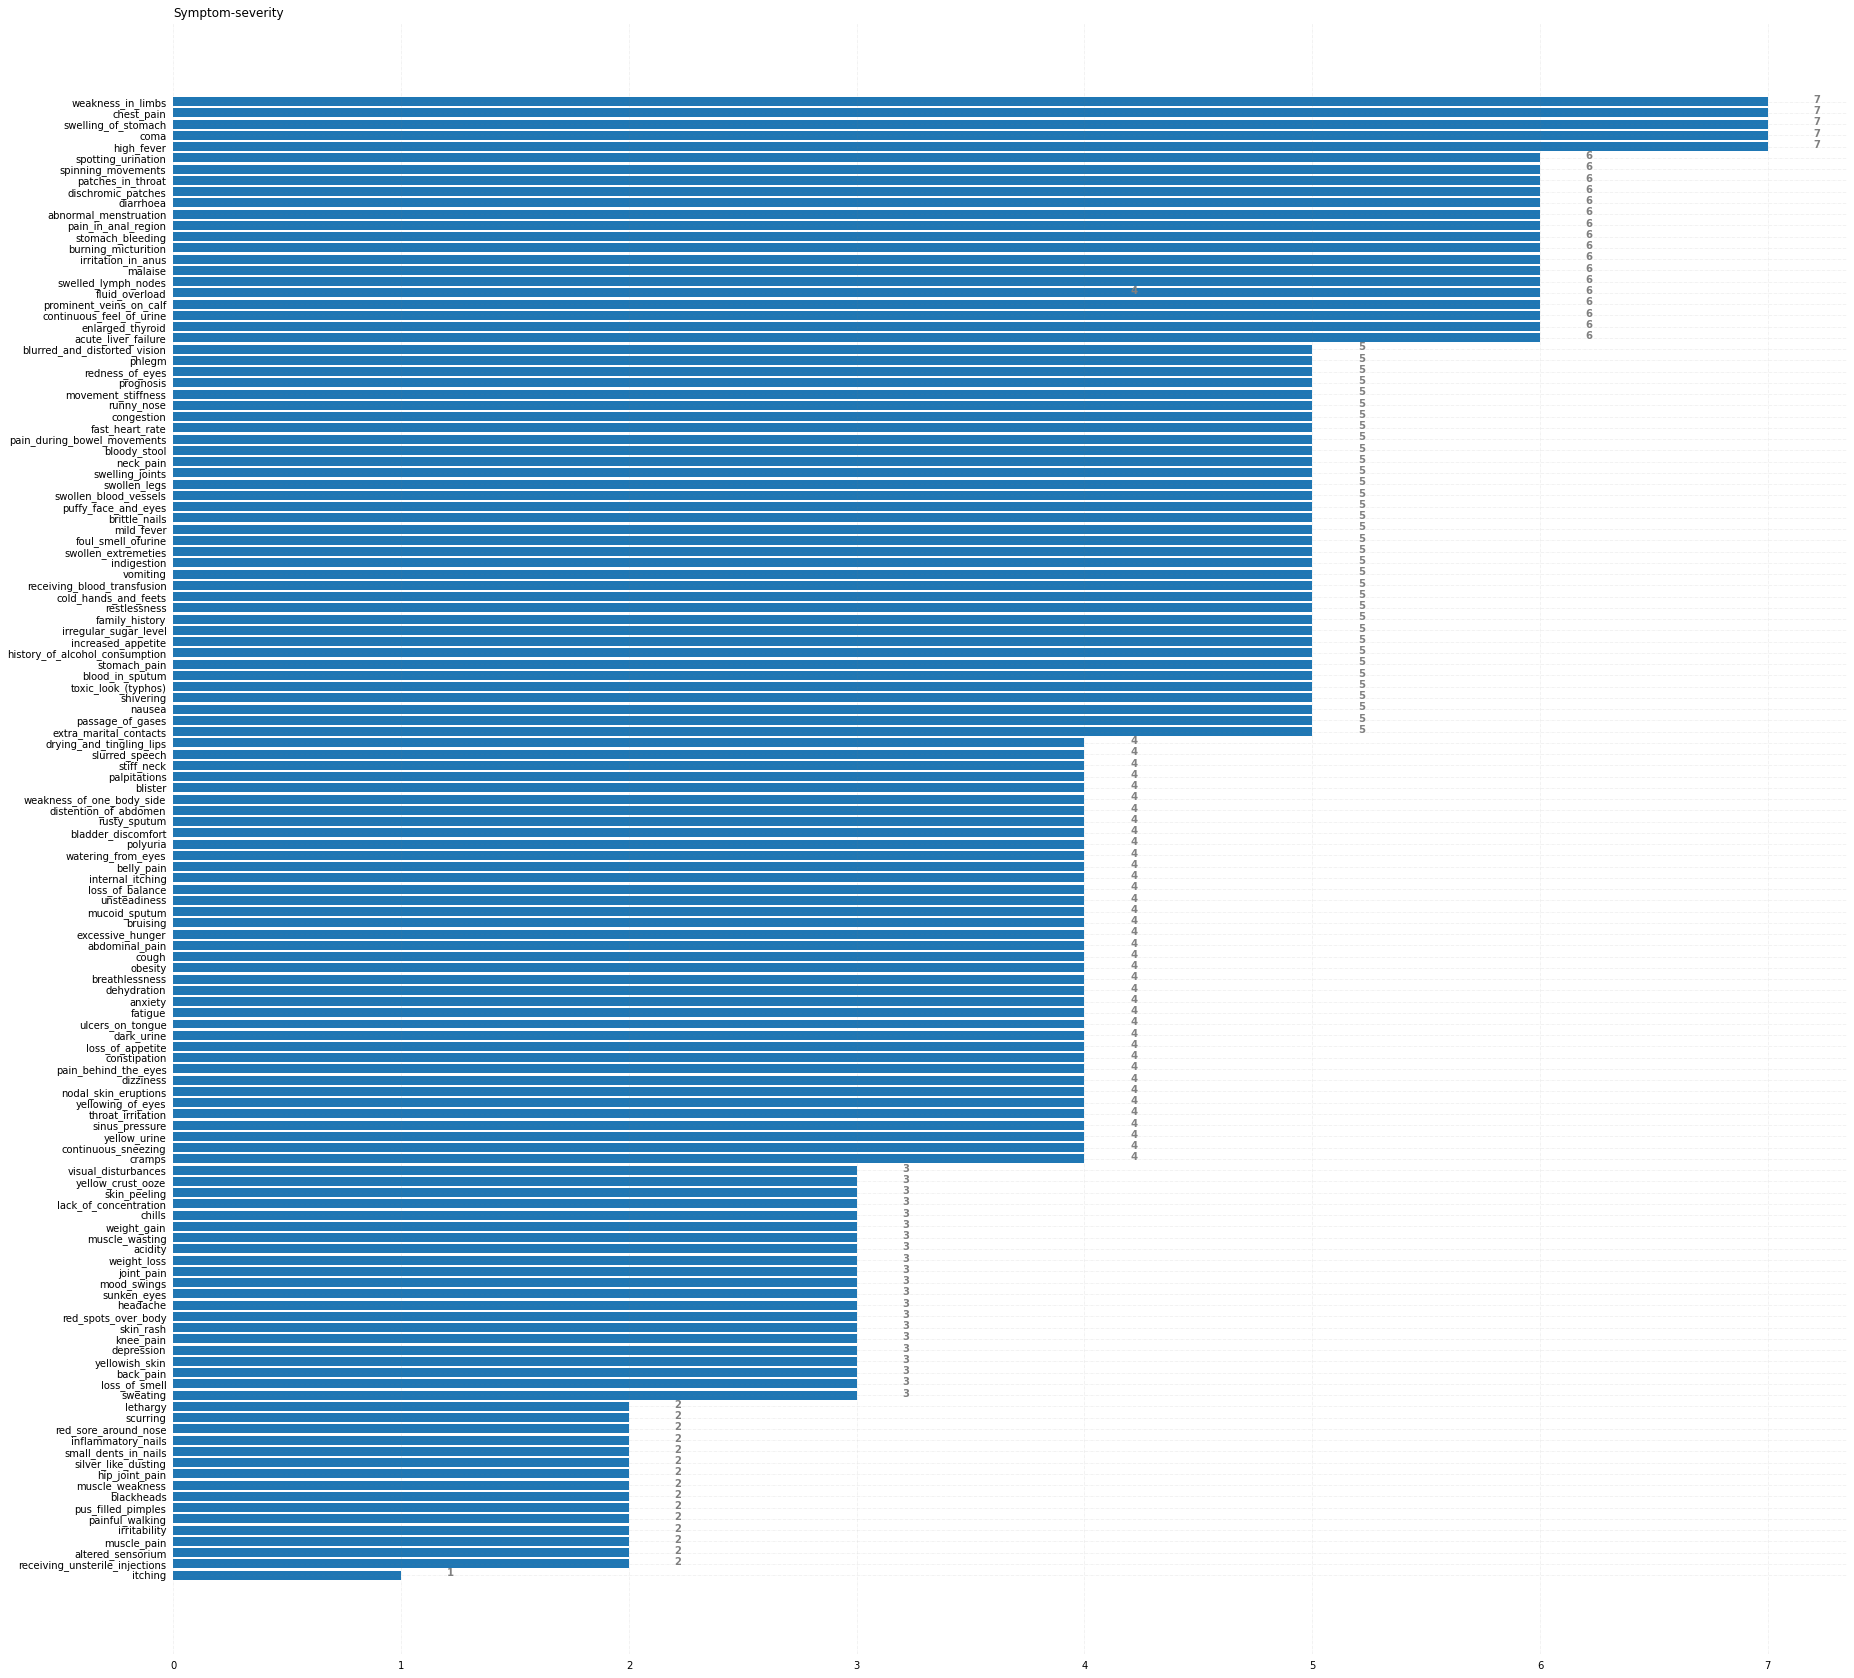

In [35]:
x1=ss['Symptom']
y1=ss['weight']
vis1,bx1 = plt.subplots(figsize=(30,30))
bx1.barh(x1,y1)
for s in ['top','bottom','left','right']:
  bx1.spines[s].set_visible(False)

bx1.xaxis.set_ticks_position('none')
bx1.yaxis.set_ticks_position('none')


bx1.grid(b=True,color='grey',linestyle='-.',linewidth = 0.5,alpha = 0.2)
bx1.invert_yaxis()

for i in bx1.patches:
  plt.text(i.get_width()+0.2,i.get_y()+0.5,str(round((i.get_width()),2)),fontsize=10,fontweight='bold',color='grey')

bx1.set_title('Symptom-severity',loc='left',)
plt.show()

In [36]:
d = ss.groupby('weight').count()
d.insert(0,'Weight',range(1,1+len(d)))
d

Weight  Symptom
weight                 
1            1        1
2            2       15
3            3       21
4            4       39
5            5       35
6            6       17
7            7        5

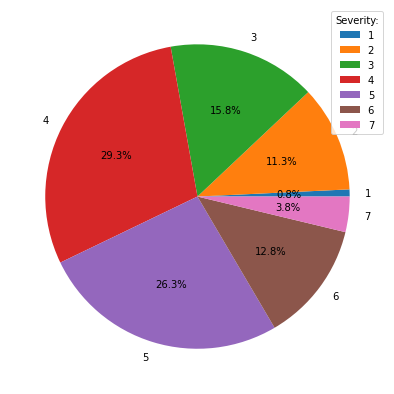

In [37]:
x2=d['Symptom']
y2=d['Weight']
vis2 = plt.figure(figsize=(10,7))
plt.pie(x2,labels=y2,autopct="%1.1f%%")
plt.legend(title="Severity:")
plt.show()

In [38]:
zz=df.copy()

In [39]:
ss['Symptom'].value_counts()

fluid_overload                 2
swelled_lymph_nodes            1
receiving_blood_transfusion    1
indigestion                    1
runny_nose                     1
                              ..
swelling_joints                1
weight_loss                    1
blister                        1
passage_of_gases               1
mucoid_sputum                  1
Name: Symptom, Length: 132, dtype: int64

In [40]:
ss.drop(117,inplace=True)


In [41]:
df['severity']=0

In [42]:
for i in range(0,len(df)):
  w=0
  l=df.iloc[i]['Symptoms']
  for x in l:
    x=x.replace(" ", "")
    # print(x)
    w+=int(ss[ss['Symptom']==x]['weight'])
  s=float(w)/int(len(l))
  df['severity'][i]=round(s,2)

In [43]:
dict={}
for x in df['Disease'].unique():
  dict[x]=df[df['Disease']==x]['severity'].mean()

In [44]:
dict

{'(vertigo) Paroymsal  Positional Vertigo': 4.0,
 'AIDS': 5.05,
 'Acne': 2.0,
 'Alcoholic hepatitis': 4.15,
 'Allergy': 3.9,
 'Arthritis': 3.1,
 'Bronchial Asthma': 4.0,
 'Cervical spondylosis': 4.1,
 'Chicken pox': 3.85,
 'Chronic cholestasis': 3.05,
 'Common Cold': 4.0,
 'Dengue': 3.25,
 'Diabetes ': 4.0,
 'Dimorphic hemmorhoids(piles)': 5.0,
 'Drug Reaction': 3.85,
 'Fungal infection': 3.0,
 'GERD': 4.1,
 'Gastroenteritis': 4.1,
 'Heart attack': 4.2,
 'Hepatitis B': 3.0,
 'Hepatitis C': 4.0,
 'Hepatitis D': 3.9,
 'Hepatitis E': 4.0,
 'Hypertension ': 3.9,
 'Hyperthyroidism': 3.15,
 'Hypoglycemia': 3.1,
 'Hypothyroidism': 4.0,
 'Impetigo': 3.15,
 'Jaundice': 3.15,
 'Malaria': 3.95,
 'Migraine': 3.0,
 'Osteoarthristis': 3.0,
 'Paralysis (brain hemorrhage)': 3.05,
 'Peptic ulcer diseae': 4.0,
 'Pneumonia': 4.0,
 'Psoriasis': 2.0,
 'Tuberculosis': 4.0,
 'Typhoid': 4.0,
 'Urinary tract infection': 5.0,
 'Varicose veins': 4.0,
 'hepatitis A': 3.95}

In [45]:
vc=pd.DataFrame(dict,index=['severity'])
vc=vc.T
vc

severity
Fungal infection                             3.00
Allergy                                      3.90
GERD                                         4.10
Chronic cholestasis                          3.05
Drug Reaction                                3.85
Peptic ulcer diseae                          4.00
AIDS                                         5.05
Diabetes                                     4.00
Gastroenteritis                              4.10
Bronchial Asthma                             4.00
Hypertension                                 3.90
Migraine                                     3.00
Cervical spondylosis                         4.10
Paralysis (brain hemorrhage)                 3.05
Jaundice                                     3.15
Malaria                                      3.95
Chicken pox                                  3.85
Dengue                                       3.25
Typhoid                                      4.00
hepatitis A                                  3.95
Hepatitis B                                  3.00
Hepatitis C                                  4.00
Hepatitis D                                  3.90
Hepatitis E                                  4.00
Alcoholic hepatitis                          4.15
Tuberculosis                                 4.00
Common Cold                                  4.00
Pneumonia                                    4.00
Dimorphic hemmorhoids(piles)                 5.00
Heart attack                                 4.20
Varicose veins                               4.00
Hypothyroidism                               4.00
Hyperthyroidism                              3.15
Hypoglycemia                                 3.10
Osteoarthristis                              3.00
Arthritis                                    3.10
(vertigo) Paroymsal  Positional Vertigo      4.00
Acne                                         2.00
Urinary tract infection                      5.00
Psoriasis                                    2.00
Impetigo                                     3.15

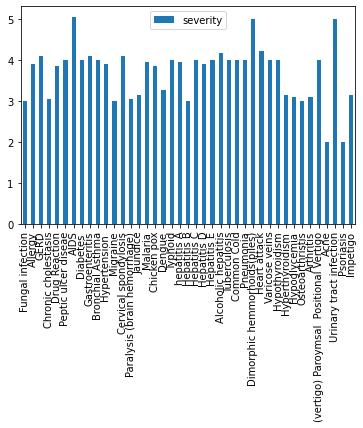

In [46]:
vc.plot(kind='bar')

In [47]:
plt.figure(figsize=(50,30))
vis3=px.scatter_matrix(vf1,dimensions=['Symptom_1','Symptom_2','Symptom_3','Symptom_4'],color='Disease')
vis3.show()

<Figure size 3600x2160 with 0 Axes>

In [48]:
fig11 = px.parallel_categories(vf1,dimensions =['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11'])
fig11.show()

In [49]:
vf1

Disease  ... Symptom_17
0                            Fungal infection  ...        NaN
1                            Fungal infection  ...        NaN
2                            Fungal infection  ...        NaN
3                            Fungal infection  ...        NaN
4                            Fungal infection  ...        NaN
...                                       ...  ...        ...
4915  (vertigo) Paroymsal  Positional Vertigo  ...        NaN
4916                                     Acne  ...        NaN
4917                  Urinary tract infection  ...        NaN
4918                                Psoriasis  ...        NaN
4919                                 Impetigo  ...        NaN

[4920 rows x 18 columns]

In [50]:
dp = pd.merge(vf1,sp,on='Disease')
dp_n=np.array_split(dp,4)
dp_n

[               Disease    Symptom_1  ...            Precaution_3      Precaution_4
 0     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 1     Fungal infection    skin_rash  ...  keep infected area dry  use clean cloths
 2     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 3     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 4     Fungal infection      itching  ...  keep infected area dry  use clean cloths
 ...                ...          ...  ...                     ...               ...
 1225     Hypertension      headache  ...           reduce stress  get proper sleep
 1226     Hypertension      headache  ...           reduce stress  get proper sleep
 1227     Hypertension    chest_pain  ...           reduce stress  get proper sleep
 1228     Hypertension      headache  ...           reduce stress  get proper sleep
 1229     Hypertension      headache  ...           reduce stress  get prope

In [51]:
vis5=px.sunburst(dp_n[0],path=['Disease','Symptom_2','Precaution_2'])
vis5.show()
vis6=px.sunburst(dp_n[1],path=['Disease','Symptom_2','Precaution_2'])
vis6.show()
vis7=px.sunburst(dp_n[2],path=['Disease','Symptom_2','Precaution_2'])
vis7.show()
vis8=px.sunburst(dp_n[3],path=['Disease','Symptom_2','Precaution_2'])
vis8.show()

In [52]:
df1

itching  ...                                  Disease
0           1  ...                         Fungal infection
1           0  ...                         Fungal infection
2           1  ...                         Fungal infection
3           1  ...                         Fungal infection
4           1  ...                         Fungal infection
...       ...  ...                                      ...
4915        0  ...  (vertigo) Paroymsal  Positional Vertigo
4916        0  ...                                     Acne
4917        0  ...                  Urinary tract infection
4918        0  ...                                Psoriasis
4919        0  ...                                 Impetigo

[4920 rows x 132 columns]

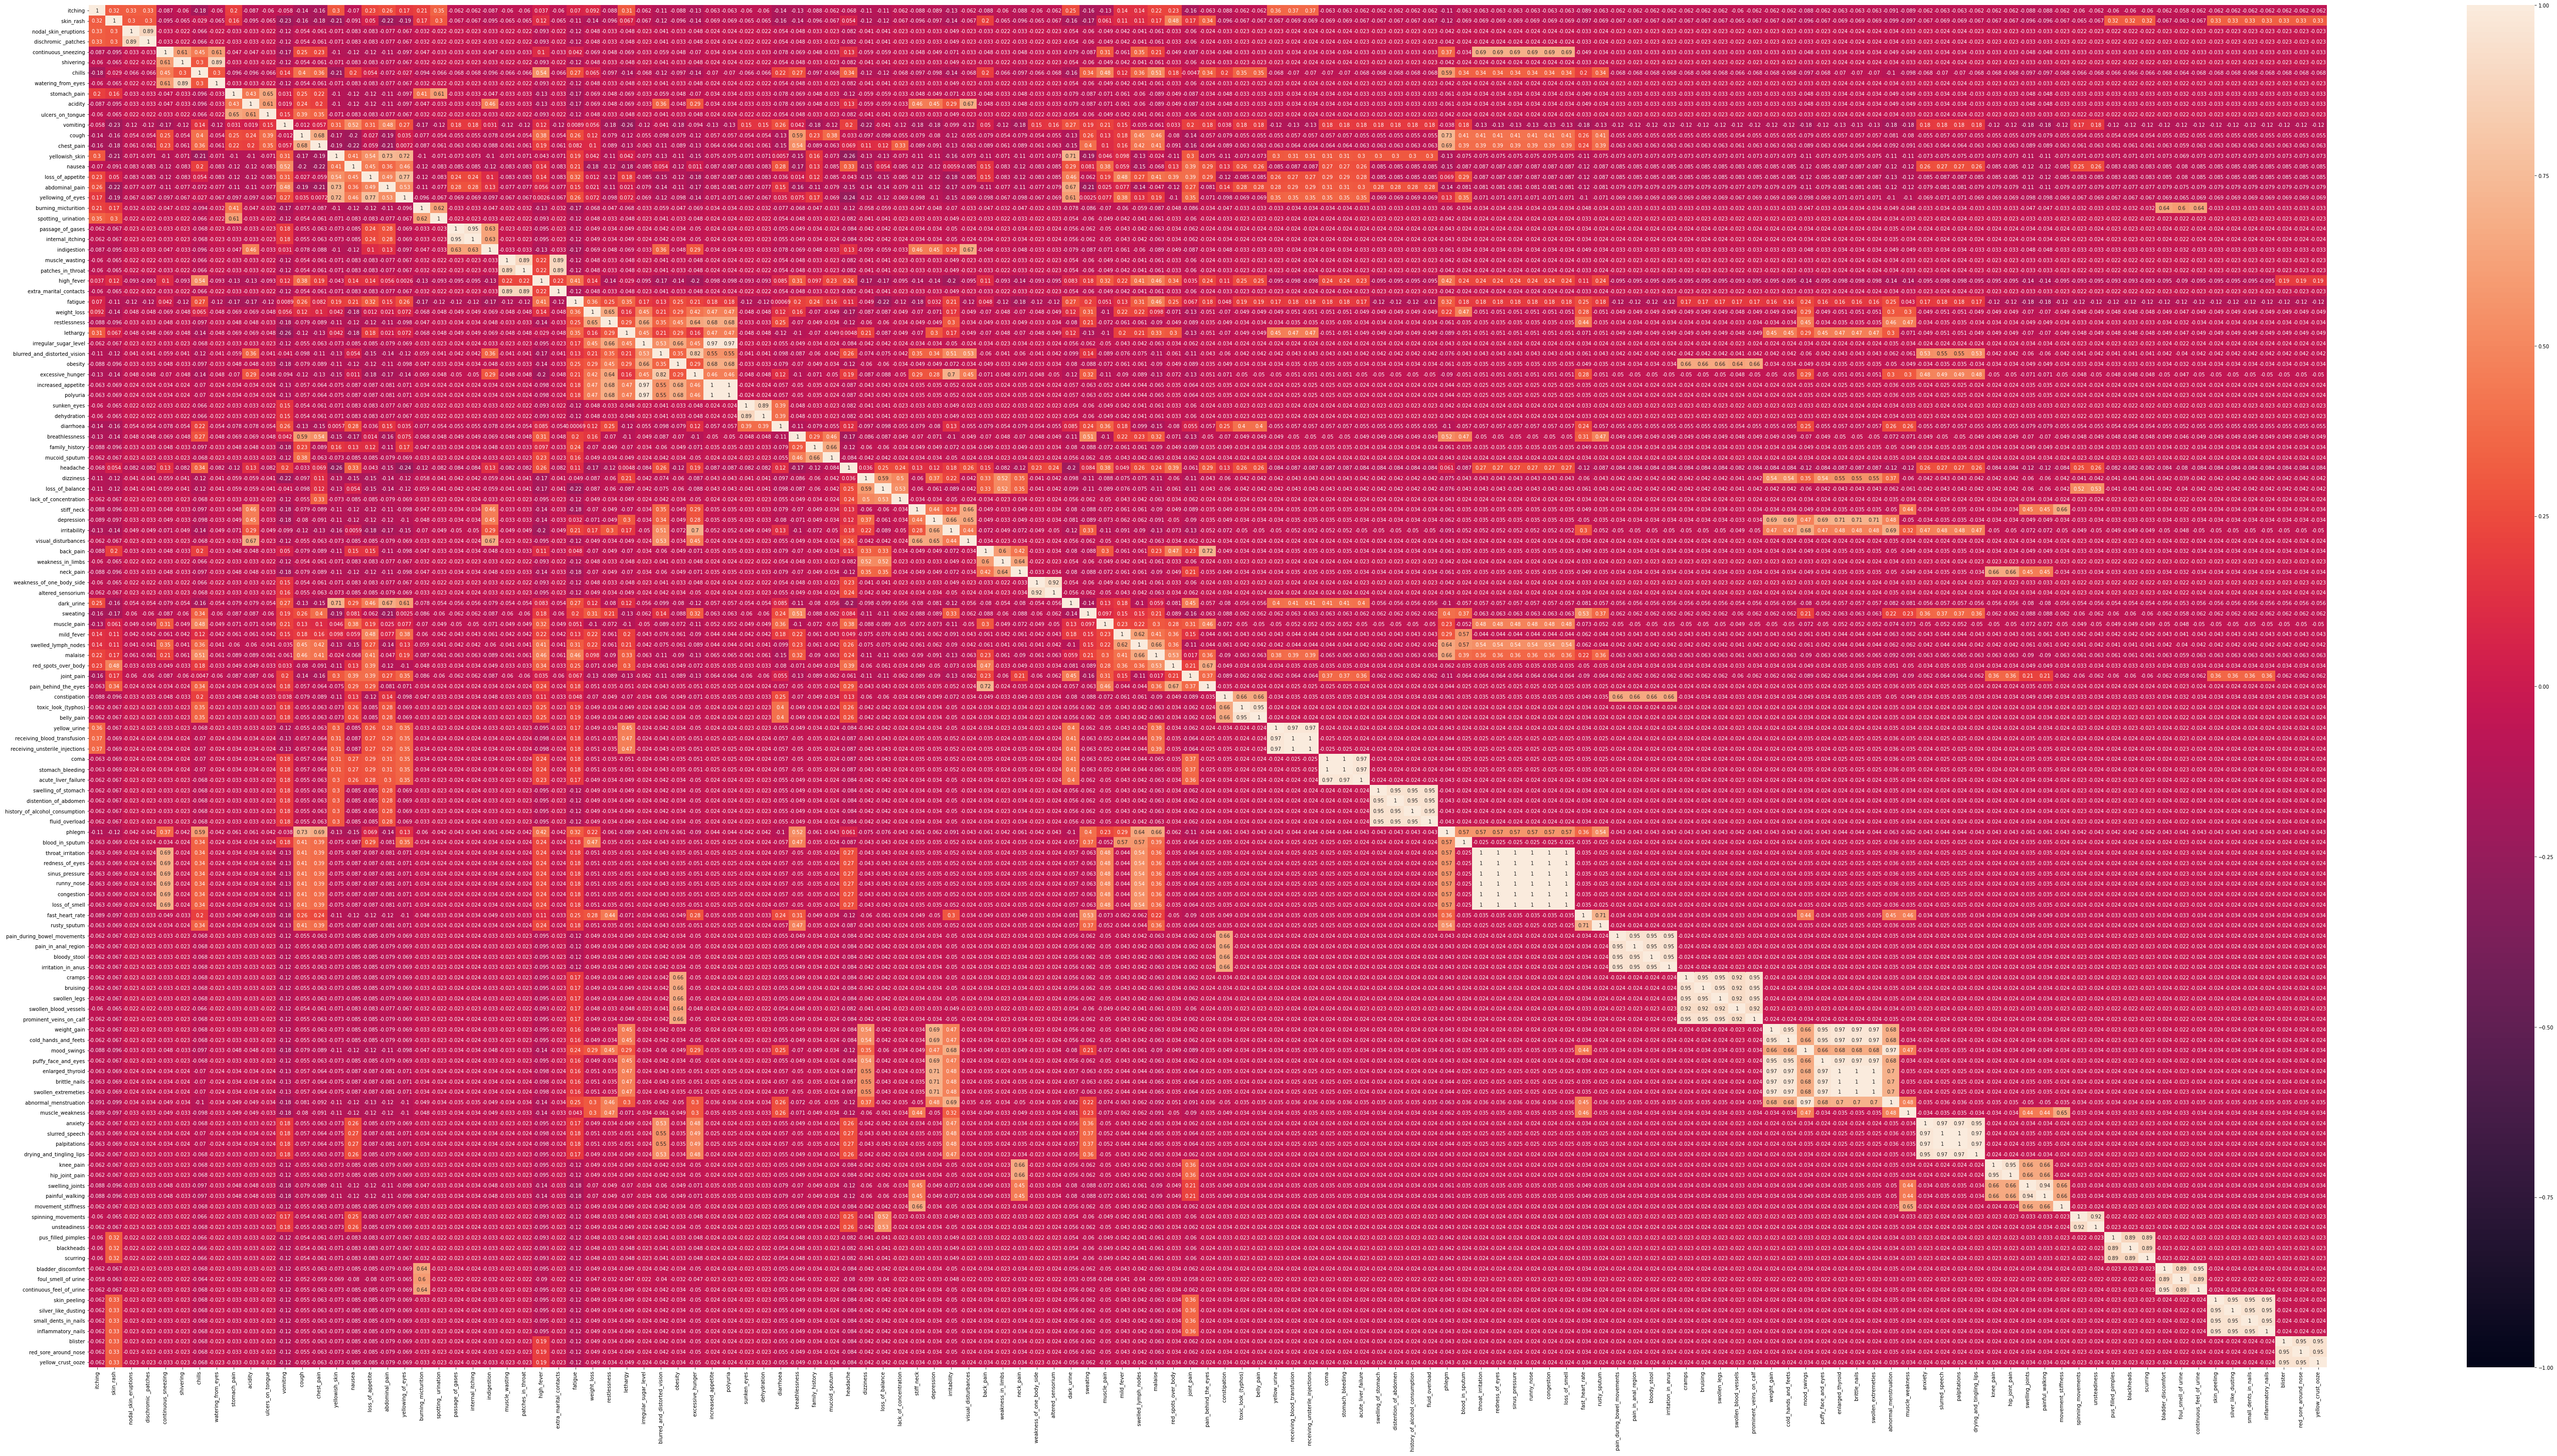

In [53]:
corr = df1.corr()
plt.subplots(figsize=(100,50))
bx3=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

**MODEL**

In [55]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,classification_report,roc_curve,roc_auc_score

In [56]:
from sklearn.model_selection import train_test_split
X=df1.drop(['Disease'],axis=1)
y=df1['Disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [57]:
predict_row=df1.iloc[0][:-1]
df1.iloc[0][-1]

'Fungal infection'

In [58]:
model_results={}

"LOGISTIC REGRESSION"

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,multi_class='multinomial')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

1.0

In [60]:
y_pred=lr.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

1.0

In [62]:
model_results['Logistic Regression']=accuracy_score(y_test,y_pred)

In [63]:
print(multilabel_confusion_matrix(y_test,y_pred))


[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [64]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [65]:
lr.predict([predict_row])

array(['Fungal infection'], dtype=object)

In [66]:
lr.predict_proba([predict_row])

array([[1.40657007e-04, 2.94664739e-04, 1.07720509e-03, 1.38155296e-04,
        3.81754385e-04, 2.51822052e-04, 1.67047836e-04, 2.58303279e-04,
        4.03473433e-04, 5.61470883e-04, 5.39434847e-05, 6.59242994e-05,
        1.15930200e-04, 2.79021932e-04, 2.32962131e-03, 9.88846692e-01,
        1.52795144e-04, 3.21064854e-04, 2.99366257e-04, 1.36451725e-04,
        1.33443981e-04, 1.95353079e-05, 2.62678509e-05, 2.26150855e-04,
        9.37588831e-05, 6.24603160e-05, 9.54685243e-05, 7.35011627e-04,
        2.65772749e-04, 7.63625324e-05, 1.38256031e-04, 2.02326587e-04,
        2.78857319e-04, 1.54859821e-04, 8.12545034e-05, 5.46115087e-04,
        2.66843041e-05, 4.41785024e-05, 2.90121671e-04, 1.84347443e-04,
        4.34006527e-05]])

KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [68]:
y_pred=knn.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred)

1.0

In [71]:
model_results['KNN']=accuracy_score(y_test,y_pred)

In [72]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [73]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [74]:
knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

In [75]:
knn.predict([predict_row])

array(['Fungal infection'], dtype=object)

In [76]:
knn.kneighbors([predict_row])

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[1767, 1060,  872,  881, 1907, 1906,  182, 1822,  997, 2007, 3103,
         1153, 3175]]))

NAIVE BYES

In [77]:
from sklearn.naive_bayes import MultinomialNB
gnb=MultinomialNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

1.0

In [78]:
y_pred=gnb.predict(X_test)

In [79]:
model_results['Multinomial NB']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [80]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [81]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [82]:
gnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [83]:
gnb.predict([predict_row])


array(['Fungal infection'], dtype='<U39')

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb2=GaussianNB()
gnb2.fit(X_train,y_train)
gnb2.score(X_test,y_test)

1.0

In [85]:
y_pred=gnb2.predict(X_test)

In [86]:
model_results['Gaussian NB']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [87]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [88]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [89]:
gnb2.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [90]:
gnb2.predict([predict_row])

array(['Fungal infection'], dtype='<U39')

DECISION TREE

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

1.0

In [92]:
y_pred=dtc.predict(X_test)

In [93]:
model_results['Decision Tree']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [94]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [95]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [96]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [97]:
dtc.predict([predict_row])

array(['Fungal infection'], dtype=object)

RANDOM FOREST

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [99]:
y_pred=rfc.predict(X_test)

In [100]:
model_results['Random Forest']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [101]:
print(multilabel_confusion_matrix(y_test,y_pred))


[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [102]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [103]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [104]:
rfc.predict([predict_row])

array(['Fungal infection'], dtype=object)

SVM

In [105]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

1.0

In [106]:
y_pred=svm.predict(X_test)

In [107]:
model_results['Linear SVM']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [108]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [109]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [110]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [111]:
svm.predict([predict_row])

array(['Fungal infection'], dtype=object)

POLYNOMIAL

In [112]:
svm2=SVC(kernel='poly')
svm2.fit(X_train,y_train)
svm2.score(X_test,y_test)

1.0

In [113]:
y_pred=svm2.predict(X_test)

In [114]:
model_results['Polynomial SVM']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [115]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [116]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [117]:
svm2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [118]:
svm2.predict([predict_row])

array(['Fungal infection'], dtype=object)

SIGMOID

In [119]:
svm3=SVC(kernel='sigmoid')
svm3.fit(X_train,y_train)
svm3.score(X_test,y_test)


1.0

In [120]:
y_pred=svm3.predict(X_test)

In [121]:
model_results['Sigmoid SVM']=accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

In [122]:
print(multilabel_confusion_matrix(y_test,y_pred))

[[[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1582    0]
  [   0   42]]

 [[1584    0]
  [   0   40]]

 [[1588    0]
  [   0   36]]

 [[1582    0]
  [   0   42]]

 [[1576    0]
  [   0   48]]

 [[1587    0]
  [   0   37]]

 [[1586    0]
  [   0   38]]

 [[1593    0]
  [   0   31]]

 [[1590    0]
  [   0   34]]

 [[1578    0]
  [   0   46]]

 [[1589    0]
  [   0   35]]

 [[1574    0]
  [   0   50]]

 [[1586    0]
  [   0   38]]

 [[1591    0]
  [   0   33]]

 [[1581    0]
  [   0   43]]

 [[1581    0]
  [   0   43]]

 [[1582    0]
  [   0   42]]

 [[1577    0]
  [   0   47]]

 [[1584    0]
  [   0   40]]

 [[1586    0]
  [   0   38]]

 [[1574    0]
  [   0   50]]

 [[1587    0]
  [   0   37]]

 [[1582    0]
  [   0   42]]

 [[1580    0]
  [   0   44]]

 [[1586    0]
  [   0   38]]

 [[1588    0]
  [   0   36]]

 [[1587    0]
  [   0   37]]

 [[1589    0]
  [   0   35]]

 [[1585    0]
  [   0   39]]

 [[1594    0]
  [   0   30]]

 [[1586    0]
  [   0   38]]

 [[1593   

In [123]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
                           

In [124]:
svm3.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [125]:
svm3.predict([predict_row])

array(['Fungal infection'], dtype=object)

INFERENCE

In [126]:
results=pd.DataFrame(model_results,index=['Accuracy score'])
results.T.sort_values('Accuracy score',ascending=False)


Accuracy score
Logistic Regression             1.0
KNN                             1.0
Multinomial NB                  1.0
Gaussian NB                     1.0
Decision Tree                   1.0
Random Forest                   1.0
Linear SVM                      1.0
Polynomial SVM                  1.0
Sigmoid SVM                     1.0

WEBAPP

In [127]:
import pickle

In [128]:
x=pd.DataFrame(columns=symptoms)

In [129]:
data = {"model": rfc, "symptoms": symptoms, "df": x , "severity": ss,"precaution": sp,"description": sd , "dataframe": vc}

In [130]:
with open('disease_predictor.pkl', 'wb') as file:
  pickle.dump(data,file)

In [131]:
with open('disease_predictor.pkl', 'rb') as file:
  data = pickle.load(file)

In [132]:
x1=data['df']
x1

Empty DataFrame
Columns: [itching,  skin_rash,  nodal_skin_eruptions,  dischromic _patches,  continuous_sneezing,  shivering,  chills,  watering_from_eyes,  stomach_pain,  acidity,  ulcers_on_tongue,  vomiting,  cough,  chest_pain,  yellowish_skin,  nausea,  loss_of_appetite,  abdominal_pain,  yellowing_of_eyes,  burning_micturition,  spotting_ urination,  passage_of_gases,  internal_itching,  indigestion,  muscle_wasting,  patches_in_throat,  high_fever,  extra_marital_contacts,  fatigue,  weight_loss,  restlessness,  lethargy,  irregular_sugar_level,  blurred_and_distorted_vision,  obesity,  excessive_hunger,  increased_appetite,  polyuria,  sunken_eyes,  dehydration,  diarrhoea,  breathlessness,  family_history,  mucoid_sputum,  headache,  dizziness,  loss_of_balance,  lack_of_concentration,  stiff_neck,  depression,  irritability,  visual_disturbances,  back_pain,  weakness_in_limbs,  neck_pain,  weakness_of_one_body_side,  altered_sensorium,  dark_urine,  sweating,  muscle_pain,  mild_fever,  swelled_lymph_nodes,  malaise,  red_spots_over_body,  joint_pain,  pain_behind_the_eyes,  constipation,  toxic_look_(typhos),  belly_pain,  yellow_urine,  receiving_blood_transfusion,  receiving_unsterile_injections,  coma,  stomach_bleeding,  acute_liver_failure,  swelling_of_stomach,  distention_of_abdomen,  history_of_alcohol_consumption,  fluid_overload,  phlegm,  blood_in_sputum,  throat_irritation,  redness_of_eyes,  sinus_pressure,  runny_nose,  congestion,  loss_of_smell,  fast_heart_rate,  rusty_sputum,  pain_during_bowel_movements,  pain_in_anal_region,  bloody_stool,  irritation_in_anus,  cramps,  bruising,  swollen_legs,  swollen_blood_vessels,  prominent_veins_on_calf,  weight_gain,  cold_hands_and_feets, ...]
Index: []

[0 rows x 131 columns]

In [133]:
sl=['itching',' skin_rash',' nodal_skin_eruptions',' dischromic _patches']

In [134]:
x3=x.copy()

In [135]:
x3

Empty DataFrame
Columns: [itching,  skin_rash,  nodal_skin_eruptions,  dischromic _patches,  continuous_sneezing,  shivering,  chills,  watering_from_eyes,  stomach_pain,  acidity,  ulcers_on_tongue,  vomiting,  cough,  chest_pain,  yellowish_skin,  nausea,  loss_of_appetite,  abdominal_pain,  yellowing_of_eyes,  burning_micturition,  spotting_ urination,  passage_of_gases,  internal_itching,  indigestion,  muscle_wasting,  patches_in_throat,  high_fever,  extra_marital_contacts,  fatigue,  weight_loss,  restlessness,  lethargy,  irregular_sugar_level,  blurred_and_distorted_vision,  obesity,  excessive_hunger,  increased_appetite,  polyuria,  sunken_eyes,  dehydration,  diarrhoea,  breathlessness,  family_history,  mucoid_sputum,  headache,  dizziness,  loss_of_balance,  lack_of_concentration,  stiff_neck,  depression,  irritability,  visual_disturbances,  back_pain,  weakness_in_limbs,  neck_pain,  weakness_of_one_body_side,  altered_sensorium,  dark_urine,  sweating,  muscle_pain,  mild_fever,  swelled_lymph_nodes,  malaise,  red_spots_over_body,  joint_pain,  pain_behind_the_eyes,  constipation,  toxic_look_(typhos),  belly_pain,  yellow_urine,  receiving_blood_transfusion,  receiving_unsterile_injections,  coma,  stomach_bleeding,  acute_liver_failure,  swelling_of_stomach,  distention_of_abdomen,  history_of_alcohol_consumption,  fluid_overload,  phlegm,  blood_in_sputum,  throat_irritation,  redness_of_eyes,  sinus_pressure,  runny_nose,  congestion,  loss_of_smell,  fast_heart_rate,  rusty_sputum,  pain_during_bowel_movements,  pain_in_anal_region,  bloody_stool,  irritation_in_anus,  cramps,  bruising,  swollen_legs,  swollen_blood_vessels,  prominent_veins_on_calf,  weight_gain,  cold_hands_and_feets, ...]
Index: []

[0 rows x 131 columns]

In [136]:
x3.loc[0]=0

In [137]:
for i in sl:
  x3[i]=1

In [138]:
x3

itching   skin_rash  ...   red_sore_around_nose   yellow_crust_ooze
0        1           1  ...                      0                   0

[1 rows x 131 columns]

In [139]:
y=x3.iloc[0]
y

itching                  1
 skin_rash               1
 nodal_skin_eruptions    1
 dischromic _patches     1
 continuous_sneezing     0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Name: 0, Length: 131, dtype: object

In [140]:
ans=rfc.predict([y])
ans[0]

'Fungal infection'

In [141]:
data['model'].predict([y])[0]

'Fungal infection'